In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import plotly.express as px
import math

#### Question 1-2
Filter data to include rows where year is 1962.

In [4]:
df = pd.read_csv('gapminder_clean.csv', index_col=[0])

0       6.748878
10      7.746253
20      7.844169
30           NaN
40           NaN
          ...   
2553         NaN
2567         NaN
2577         NaN
2587    7.281197
2597    6.267717
Name: gdpPercap, Length: 259, dtype: float64

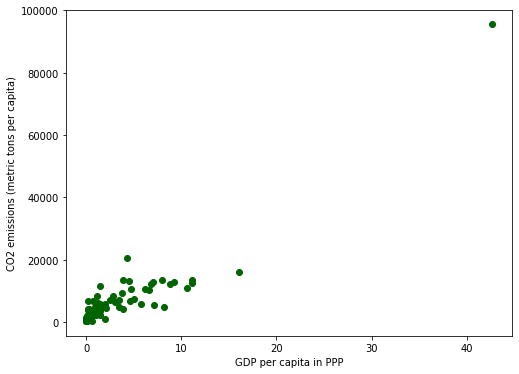

In [7]:
df62=df.loc[np.where((df['Year']==1962))]
plt.figure(figsize=(8,6))
co2=df62['CO2 emissions (metric tons per capita)']
gdp=df62['gdpPercap']

plt.scatter(np.log(gdp), gdp, c='darkgreen')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('GDP per capita in PPP')
plt.title('')
#plt.show()


#### Question 3 
What is the Pearson r value and associated p value?  
The correlation coefficient is 0.92 which indicates a strong relationship between the two variables. However, we do not use the r value for prediction since it does not tell us how well predicted values match onto actual values. 

In [27]:
m=pg.corr(co2, gdp)
print('r: ', m['r'], '\n')
print('p-val: ', m['p-val'])

r:  pearson    0.926082
Name: r, dtype: float64 

p-val:  pearson    1.128679e-46
Name: p-val, dtype: float64


#### Question 4
Year 1967 is the year the correlation between CO2 emissions and gdpPercap is the highest, at r=~0.94

In [ ]:
yrs=list(df['Year'].value_counts().index)
ls=[]
for y in yrs: 
    a=df.loc[np.where((df['Year']==y))]
    c=pg.corr(a['CO2 emissions (metric tons per capita)'], a['gdpPercap'])
    c['year']=y
    ls.append(c)
pd.concat(ls).sort_values(by=['p-val'], ascending=True) #1967 

#### Question 5
Interactive plot

In [7]:
yr67=df[df['Year']==1967]
yr67=yr67[["gdpPercap","CO2 emissions (metric tons per capita)", 'pop',
         'continent' ]].dropna()
fig=px.scatter(yr67, x="gdpPercap", y="CO2 emissions (metric tons per capita)", 
           color="continent",
                 size='pop')
fig.show()